<a href="https://colab.research.google.com/github/saivenkatreddy29/TensorFlow-Learning/blob/main/Introduction_to_computer_vision_with_tensorflow_version%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-07-17 00:21:08--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.107.207, 74.125.196.207, 173.194.216.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.107.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M  49.2MB/s    in 2.1s    

2024-07-17 00:21:11 (49.2 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [3]:
import numpy as np
import pandas as pd
import tensorflow as tr
import matplotlib.pyplot as plt

In [4]:
import random
import matplotlib.image as mpimg

In [5]:
import os

In [6]:
def random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f"image shape is {img.shape}")

  return img

['3640915.jpg']
image shape is (512, 384, 3)


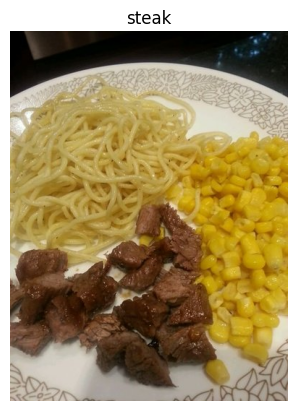

In [7]:
img = random_image('pizza_steak/train/', 'steak')

In [40]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:


tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = "/content/pizza_steak/test"
val_dir = "/content/pizza_steak/train"

train_data = train_datagen.flow_from_directory(directory = train_dir, batch_size = 32, target_size = (224,224), class_mode = "binary",seed = 42 )
valid_data = valid_datagen.flow_from_directory(directory = val_dir, batch_size = 32, target_size = (224,224), class_mode = "binary", seed = 42)




In [ ]:
model_1 = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = (224,224,3)),
        tf.keras.layers.Conv2D(10,3,activation = 'relu'),
        tf.keras.layers.MaxPool2D(pool_size = 2, padding = 'valid'),
        tf.keras.layers.Conv2D(10,2,activation = 'relu'),
        tf.keras.layers.Conv2D(10,3,activation = 'relu'),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1,activation = 'sigmoid')


    ]
)

In [ ]:
model_1.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

In [ ]:
history_1 = model_1.fit(train_data, epochs = 5, steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data)
                        )

# Read CNN explainer to learn more information

In [ ]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),

])

model2.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])
history_2 = model2.fit(train_data, epochs = 5, steps_per_epoch = len(train_data), validation_data = valid_data, validation_steps = len(valid_data))

In [ ]:
model2.summary()

### **Without cnn layers**

In [ ]:
model3 = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(100, 'relu'),
    tf.keras.layers.Dense(100, 'relu') ,
    tf.keras.layers.Dense(100,'relu'),
    tf.keras.layers.Dense(1,'sigmoid'),


])

model3.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])
model3.fit(train_data, epochs = 5, steps_per_epoch = len(train_data), validation_data = valid_data,validation_steps = len(valid_data) )

### **Using Data Augumentation**

In [42]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten, Conv2D, MaxPool2D,Activation
from tensorflow.keras import Sequential

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_data_aug = ImageDataGenerator(rescale = 1./255,
                                    rotation_range = 20,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    width_shift_range = 0.2,
                                    height_shift_range = 0.2,
                                    horizontal_flip =True,

)

In [11]:
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [12]:

test_dir = "/content/pizza_steak/test"
train_dir = "/content/pizza_steak/train"


In [13]:
print('augumented Data')
train_data_aug = train_data_aug.flow_from_directory(train_dir, target_size= (224,224),
                                                    batch_size = 32,
                                                    class_mode = 'binary',
                                                    shuffle = False)
print('test_data')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size = 32,class_mode = 'binary', shuffle = False)


augumented Data
Found 1500 images belonging to 2 classes.
test_data
Found 500 images belonging to 2 classes.


In [14]:
# Get data batch samples
images, labels = train_data_aug.next()


(-0.5, 223.5, 223.5, -0.5)

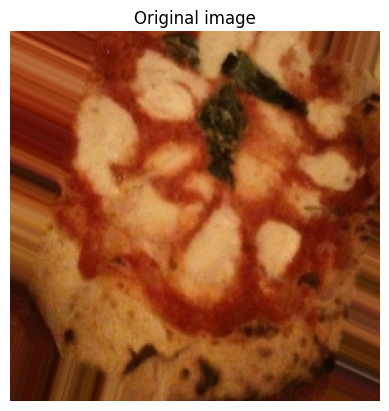

In [15]:
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)


In [16]:
model4 = Sequential([

    Conv2D(10,3,input_shape = (224,224,3)),
    MaxPool2D(2),
    Conv2D(10,3,activation ='relu'),
    MaxPool2D(2),
    Conv2D(10,3,activation ='relu'),
    MaxPool2D(2),
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(1,'sigmoid')

])

In [17]:
model4.compile(loss = 'binary_crossentropy',
               optimizer = Adam(),
               metrics = ['accuracy'])

In [18]:
history4 = model4.fit(train_data_aug, epochs = 5,
                      validation_data = test_data,
                      steps_per_epoch = len(train_data_aug),
                      validation_steps =len(test_data))

Epoch 1/5
47/47 [==============================] - 71s 1s/step - loss: 0.7161 - accuracy: 0.4680 - val_loss: 0.6851 - val_accuracy: 0.6300
Epoch 2/5
47/47 [==============================] - 65s 1s/step - loss: 0.6921 - accuracy: 0.5493 - val_loss: 0.6750 - val_accuracy: 0.6380
Epoch 3/5
47/47 [==============================] - 69s 1s/step - loss: 0.7200 - accuracy: 0.5287 - val_loss: 0.6915 - val_accuracy: 0.5620
Epoch 4/5
47/47 [==============================] - 62s 1s/step - loss: 0.6904 - accuracy: 0.5393 - val_loss: 0.6701 - val_accuracy: 0.7100
Epoch 5/5
47/47 [==============================] - 64s 1s/step - loss: 0.6953 - accuracy: 0.5887 - val_loss: 0.6838 - val_accuracy: 0.5280


## **5th Model**

In [44]:
train_data_aug = ImageDataGenerator(rescale = 1./255,
                                    rotation_range = 20,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    width_shift_range = 0.2,
                                    height_shift_range = 0.2,
                                    horizontal_flip =True,

)

In [45]:
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [46]:

test_dir = "/content/pizza_steak/test"
train_dir = "/content/pizza_steak/train"


In [47]:
print('augumented Data')
train_data_aug = train_data_aug.flow_from_directory(train_dir, target_size= (224,224),
                                                    batch_size = 32,
                                                    class_mode = 'binary',
                                                    shuffle = True)
print('test_data')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size = 32,class_mode = 'binary', shuffle = False)


augumented Data
Found 1500 images belonging to 2 classes.
test_data
Found 500 images belonging to 2 classes.


In [48]:
model5 = Sequential([

    Conv2D(20,3,input_shape = (224,224,3)),
    MaxPool2D(2),
    Conv2D(20,3,activation ='relu'),
    MaxPool2D(2),
    Conv2D(20,3,activation ='relu'),
    MaxPool2D(2),
    Conv2D(20,3,activation = 'relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(1,'sigmoid')

])

In [49]:
model5.compile(loss = 'binary_crossentropy',
               optimizer = Adam(),
               metrics = ['accuracy'])

In [50]:
history5 = model5.fit(train_data_aug, epochs = 5,
                      validation_data = test_data,
                      steps_per_epoch = len(train_data_aug),
                      validation_steps =len(test_data))

Epoch 1/5
47/47 [==============================] - 93s 2s/step - loss: 0.6587 - accuracy: 0.6127 - val_loss: 0.5588 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 97s 2s/step - loss: 0.5775 - accuracy: 0.7080 - val_loss: 0.4174 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 94s 2s/step - loss: 0.5281 - accuracy: 0.7507 - val_loss: 0.5401 - val_accuracy: 0.6960
Epoch 4/5
47/47 [==============================] - 95s 2s/step - loss: 0.5030 - accuracy: 0.7673 - val_loss: 0.3482 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 96s 2s/step - loss: 0.4770 - accuracy: 0.7827 - val_loss: 0.3525 - val_accuracy: 0.8500


In [20]:
pizza = mpimg.imread('/content/pizza_image.jpg')

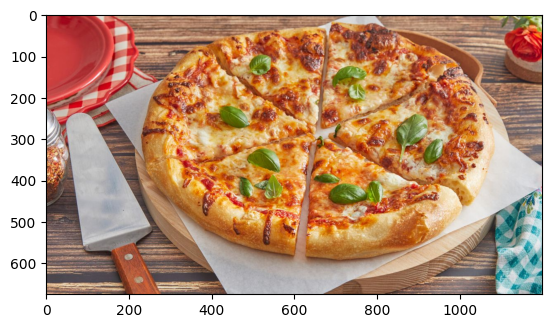

In [22]:
plt.imshow(pizza)

In [25]:
import tensorflow as tf

In [26]:
pizza = tf.expand_dims(pizza,axis = 0)

In [28]:
pizza.shape

TensorShape([1, 675, 1200, 3])

In [63]:
def prep_image(file_name, img_shape = (224)):
  img = tf.io.read_file(file_name)
  img = tf.image.decode_image(img)

  #reshape according to requirement
  img = tf.image.resize(img, size = [img_shape, img_shape])

  img = img/255.

  img_dim = tf.expand_dims(img, axis = 0)
  return img,img_dim

In [34]:
pizza_new = prep_image('/content/pizza_image.jpg')[1]

In [35]:
pizza_new.shape

TensorShape([1, 224, 224, 3])

In [57]:
pred = model5.predict(pizza_new)

1/1 [==============================] - 0s 54ms/step


# **Understand Clearly which class this belongs too**

In [54]:
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/pizza_steak/test") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [55]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [58]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'pizza'

In [65]:
def find_image(model,file_name):
  pizza, pizza_new = prep_image(file_name)

  plt.imshow(pizza)
  pred = model.predict(pizza_new)
  pred_class = class_names[int(tf.round(pred)[0][0])]
  plt.title(f'prediction is {pred_class}')

1/1 [==============================] - 0s 33ms/step


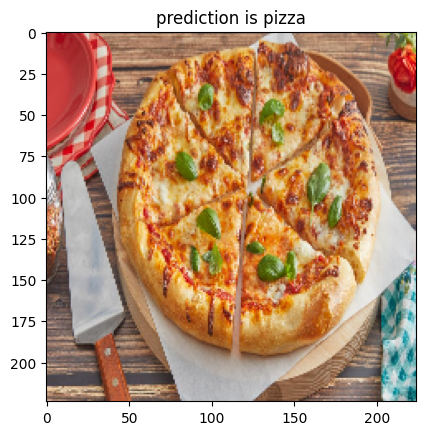

In [66]:
find_image(model5,'/content/pizza_image.jpg')